In [2]:
!git clone https://gitlab.com/webnlg/webnlg-human-evaluation

Cloning into 'webnlg-human-evaluation'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 111 (delta 38), reused 103 (delta 32), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 914.64 KiB | 6.10 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [1]:
!Rscript -e 'install.packages(c("agricolae", "irr", "reshape2", "Hmisc", "corrplot"), repos="https://cloud.r-project.org/")'

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘checkmate’, ‘AlgDesign’, ‘lpSolve’, ‘plyr’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’

trying URL 'https://cloud.r-project.org/src/contrib/checkmate_2.3.2.tar.gz'
Content type 'application/x-gzip' length 229874 bytes (224 KB)
downloaded 224 KB

trying URL 'https://cloud.r-project.org/src/contrib/AlgDesign_1.2.1.1.tar.gz'
Content type 'application/x-gzip' length 420332 bytes (410 KB)
downloaded 410 KB

trying URL 'https://cloud.r-project.org/src/contrib/lpSolve_5.6.21.tar.gz'
Content type 'application/x-gzip' length 467619 bytes (456 KB)
downloaded 456 KB

trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.9.tar.gz'
Content type 'application/x-gzip' length 401488 bytes (392 KB)
downloaded 392 KB

trying URL 'https://cloud.r-project.org/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB

trying

In [ ]:
!cd webnlg-human-evaluation/; Rscript human-evaluation.R


Attaching package: ‘Hmisc’

The following objects are masked from ‘package:plyr’:

    is.discrete, summarize

The following objects are masked from ‘package:xtable’:

    label, label<-

The following objects are masked from ‘package:base’:

    format.pval, units

corrplot 0.94 loaded
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Fri Aug 30 13:08:14 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrl}
  \hline
 & dep\_var & groups \\ 
  \hline
webnlg & 2.77 & a \\ 
  upf-forge & 2.68 & a \\ 
  tilburg-smt & 2.42 & b \\ 
  melbourne & 2.30 & bc \\ 
  adapt & 2.30 & bc \\ 
  tilburg-pipe & 2.20 & cd \\ 
  pkuwriter & 2.08 & de \\ 
  tilburg-nmt & 1.99 & ef \\ 
  baseline & 1.86 & f \\ 
  vietnam & 1.42 & g \\ 
   \hline
\end{tabular}
\end{table}
% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Fri Aug 30 13:08:14 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrl}
  \hline
 & dep\_var & groups \\ 
  \hline
webnlg & 2.61 & a \\ 
  upf-forge & 2.47 & ab \

In [3]:
import pandas as pd
import numpy as np

In [4]:
raw_ratings_df = pd.read_csv('webnlg-human-evaluation/all_data_final_scores_anonymised.csv', index_col=0)

In [5]:
raw_ratings_df.head()

,X_unit_id,X_worker_id,fluency,grammaticality,semantic_adequacy,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize
1,1433935686,13581319,3,1,1,"Elliot_See | deathDate | ""1966-02-28""",tilburg-smt,"on february 28, 1966.",Astronaut,seen,0.054,0.354628,75.0,smt,1triple
2,1433935686,43942797,3,3,3,"Elliot_See | deathDate | ""1966-02-28""",tilburg-smt,"on february 28, 1966.",Astronaut,seen,0.054,0.354628,75.0,smt,1triple
3,1433935687,43891892,3,2,3,Batagor | dishVariation | Shumai,pkuwriter,shumai can be included in arrabbiaita sauce.,Food,seen,0.043,0.161864,75.0,neural,1triple
4,1433935687,43942797,3,3,3,Batagor | dishVariation | Shumai,pkuwriter,shumai can be included in arrabbiaita sauce.,Food,seen,0.043,0.161864,75.0,neural,1triple
5,1433935687,44014780,1,1,1,Batagor | dishVariation | Shumai,pkuwriter,shumai can be included in arrabbiaita sauce.,Food,seen,0.043,0.161864,75.0,neural,1triple


In [7]:
raw_ratings_df.sample(10)

,X_unit_id,X_worker_id,fluency,grammaticality,semantic_adequacy,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize
974,1433935982,34070076,2,2,1,Asher_and_Mary_Isabelle_Richardson_House | Ref...,tilburg-pipe,asher and mary isabelle richardson house has 8...,Building,seen,0.386,0.518458,25.000,template,1triple
5759,1461482125,27770607,2,3,2,A.C._Lumezzane | manager | Michele_Marcolini<b...,tilburg-nmt,the leader of michele marcolini is fc bari 190...,SportsTeam,seen,0.089,0.340281,69.333,neural,5triple
1399,na,na,1,1,1,Azerbaijan | leaderTitle | Prime_Minister_of_A...,vietnam,NaN,Monument,seen,0.000,0.000000,95.122,template,1triple
3713,1459450133,13763729,1,1,2,School of Business and Social Sciences at the ...,tilburg-smt,school of business and social sciences at the ...,University,seen,0.276,0.424599,128.571,smt,3triple
527,1433935840,34650780,3,3,1,"Airey_Neave | birthPlace | ""Knightsbridge, Lon...",baseline,"the birth place of antwerp is knightsbridge, l...",Politician,unseen,0.057,0.274286,94.737,neural,1triple
3871,1461304846,21813440,3,3,3,Akita_Museum_of_Art | country | Japan<br>Akita...,tilburg-pipe,"akita museum of art is in akita, akita, akita ...",Building,seen,0.114,0.430784,51.064,template,4triple
3862,1461304843,21813440,2,2,1,Airey_Neave | battles | Battle_of_France<br>Ai...,adapt,"aenir was born in knightsbridge, england and w...",Politician,unseen,0.140,0.177717,96.970,neural,4triple
1164,1433936045,43843960,3,3,3,Antwerp_International_Airport | operatingOrgan...,vietnam,the antwerp international airport is run by th...,Airport,seen,0.360,0.521286,54.545,template,1triple
3147,1459449924,40493936,3,3,1,Elliot_See | almaMater | University_of_Texas_a...,pkuwriter,elliot see was born in dallas and graduated fr...,Astronaut,seen,0.553,0.487584,35.000,neural,3triple
800,1433935927,43697153,1,1,1,Azerbaijan | leader | Artur_Rasizade,vietnam,"artur rasizade, is one of the leaders, in the ...",Monument,seen,0.042,0.400997,95.455,template,1triple


In [8]:
df = raw_ratings_df.loc[(raw_ratings_df['X_worker_id'] != 'na') & (raw_ratings_df['X_unit_id'] != 'na') & (raw_ratings_df['fluency'].isna() == False)]

In [9]:
!pip install simpledorff

# Other Python IAA implementations

* simpledorff
* krippendorff






**DO NOT USE NLTK FOR KRIPPENDORFF**

In [10]:
import simpledorff
ratings_columns = ['fluency', 'grammaticality', 'semantic_adequacy']
for rating_class in ratings_columns:
    print(f"Krippendorff's alpha for {rating_class}", simpledorff.calculate_krippendorffs_alpha_for_df(df,experiment_col='X_unit_id',
                                                 annotator_col='X_worker_id',
                                                 class_col=rating_class))


Krippendorff's alpha for fluency 0.26429349085534914
Krippendorff's alpha for grammaticality 0.20298250208713686
Krippendorff's alpha for semantic_adequacy 0.3755634292390605


In [11]:
ratings_df = pd.read_csv('webnlg-human-evaluation/all_data_final_averaged.csv', index_col=0)

In [12]:
ratings_df

,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize,fluency,grammar,semantics
id,,,,,,,,,,,,,
1,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,adapt,"the 29075 club is the dictcoverer, carl a. wir...",CelestialBody,unseen,0.041,0.185956,90.909,neural,1triple,1.666667,1.666667,1.333333
2,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,baseline,the administrative government is governed by t...,CelestialBody,unseen,0.034,0.046764,90.909,neural,1triple,2.750000,2.750000,1.000000
3,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,melbourne,1950 da is carl a. wirtanen.,CelestialBody,unseen,0.066,0.320360,81.818,neural,1triple,2.000000,2.333333,1.000000
4,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,pkuwriter,carl a. wirtanen discovered (29075) 1950 da.,CelestialBody,unseen,0.045,0.561305,54.545,neural,1triple,3.000000,2.666667,2.333333
5,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,tilburg-nmt,the chair of (29075) 1950 da is carl a. wirtanen.,CelestialBody,unseen,0.076,0.430547,81.818,neural,1triple,1.750000,2.250000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,"William_Anders | status | ""Retired""<br>William...",tilburg-pipe,william anders graduated from afit in 1962 him...,Astronaut,seen,0.131,0.312793,59.091,template,2triple,1.666667,1.666667,2.333333
2227,"William_Anders | status | ""Retired""<br>William...",tilburg-smt,william anders is now retired. william anders ...,Astronaut,seen,0.085,0.434852,77.273,smt,2triple,2.333333,2.666667,3.000000
2228,"William_Anders | status | ""Retired""<br>William...",upf-forge,"william anders, who graduated from afit in 196...",Astronaut,seen,0.124,0.412168,68.182,template,2triple,3.000000,3.000000,3.000000


In [13]:
ratings_df.sample(10)

,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize,fluency,grammar,semantics
id,,,,,,,,,,,,,
2014,School of Business and Social Sciences at the ...,pkuwriter,the school of business and social sciences at ...,University,seen,0.782,0.586106,13.793,neural,3triple,3.000000,3.000000,3.000000
160,110_Lydia | epoch | 2006-12-31<br>110_Lydia | ...,webnlg,the epoch date of 110 lydia is 31 december 200...,CelestialBody,unseen,1.000,1.000000,0.000,human,2triple,2.333333,2.333333,2.666667
1309,Azerbaijan | capital | Baku<br>Azerbaijan | le...,vietnam,NaN,Monument,seen,0.000,0.000000,86.441,template,5triple,1.000000,1.000000,1.000000
1548,Blockbuster_(comicsCharacter) | creator | Gard...,upf-forge,"gardner fox created the character blockbuster,...",ComicsCharacter,seen,0.073,0.343411,77.778,template,3triple,1.666667,2.333333,2.666667
927,Alessio_Romagnoli | youthclub | A.S._Roma,tilburg-smt,alessio romagnoli played youth football for a....,Athlete,unseen,0.074,0.388802,63.158,smt,1triple,3.000000,2.333333,2.333333
1970,Peter_Stöger | club | SK_Vorwärts_Steyr<br>Pet...,webnlg,peter stoger is the manager at 1 . fc koln . h...,SportsTeam,seen,1.000,1.000000,0.000,human,4triple,2.500000,3.000000,3.000000
65,103_Hera | discoverer | James_Craig_Watson<br>...,tilburg-nmt,"103 hera died in james craig watson, which has...",CelestialBody,unseen,0.080,0.361856,71.739,neural,2triple,1.000000,2.000000,1.000000
1438,Batagor | dishVariation | Shumai,upf-forge,shumai can be a variation of batagor.,Food,seen,0.043,0.965181,50.000,template,1triple,3.000000,3.000000,2.333333
1289,"Auburn,_Washington | isPartOf | Pierce_County,...",vietnam,NaN,City,seen,0.000,0.000000,90.244,template,5triple,1.000000,1.000000,1.000000


In [ ]:
ratings_df.head()

,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize,fluency,grammar,semantics
id,,,,,,,,,,,,,
1,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,adapt,"the 29075 club is the dictcoverer, carl a. wir...",CelestialBody,unseen,0.041,0.185956,90.909,neural,1triple,1.666667,1.666667,1.333333
2,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,baseline,the administrative government is governed by t...,CelestialBody,unseen,0.034,0.046764,90.909,neural,1triple,2.750000,2.750000,1.000000
3,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,melbourne,1950 da is carl a. wirtanen.,CelestialBody,unseen,0.066,0.320360,81.818,neural,1triple,2.000000,2.333333,1.000000
4,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,pkuwriter,carl a. wirtanen discovered (29075) 1950 da.,CelestialBody,unseen,0.045,0.561305,54.545,neural,1triple,3.000000,2.666667,2.333333
5,(29075)_1950_DA | discoverer | Carl_A._Wirtanen,tilburg-nmt,the chair of (29075) 1950 da is carl a. wirtanen.,CelestialBody,unseen,0.076,0.430547,81.818,neural,1triple,1.750000,2.250000,1.500000


In [ ]:
ratings_df.tail()

,mr,team,text,category,type,bleu,meteor,ter,systemtype,triplesize,fluency,grammar,semantics
id,,,,,,,,,,,,,
2226,"William_Anders | status | ""Retired""<br>William...",tilburg-pipe,william anders graduated from afit in 1962 him...,Astronaut,seen,0.131,0.312793,59.091,template,2triple,1.666667,1.666667,2.333333
2227,"William_Anders | status | ""Retired""<br>William...",tilburg-smt,william anders is now retired. william anders ...,Astronaut,seen,0.085,0.434852,77.273,smt,2triple,2.333333,2.666667,3.000000
2228,"William_Anders | status | ""Retired""<br>William...",upf-forge,"william anders, who graduated from afit in 196...",Astronaut,seen,0.124,0.412168,68.182,template,2triple,3.000000,3.000000,3.000000
2229,"William_Anders | status | ""Retired""<br>William...",vietnam,NaN,Astronaut,seen,0.000,0.000000,95.455,template,2triple,1.000000,1.000000,1.000000
2230,"William_Anders | status | ""Retired""<br>William...",webnlg,"william anders graduated , with an m . s . , f...",Astronaut,seen,1.000,1.000000,0.000,human,2triple,3.000000,2.666667,3.000000


In [14]:
ratings_df.describe()

,bleu,meteor,ter,fluency,grammar,semantics
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,0.241391,0.418217,59.453191,2.131345,2.223378,2.199709
std,0.289667,0.272278,30.181619,0.704540,0.675336,0.756654
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.059000,0.281395,45.455000,1.666667,1.666667,1.500000
50%,0.129000,0.385286,62.791000,2.333333,2.333333,2.333333
75%,0.294000,0.485533,76.250750,2.666667,2.666667,3.000000
max,1.000000,1.000000,276.596000,3.000000,3.000000,3.000000


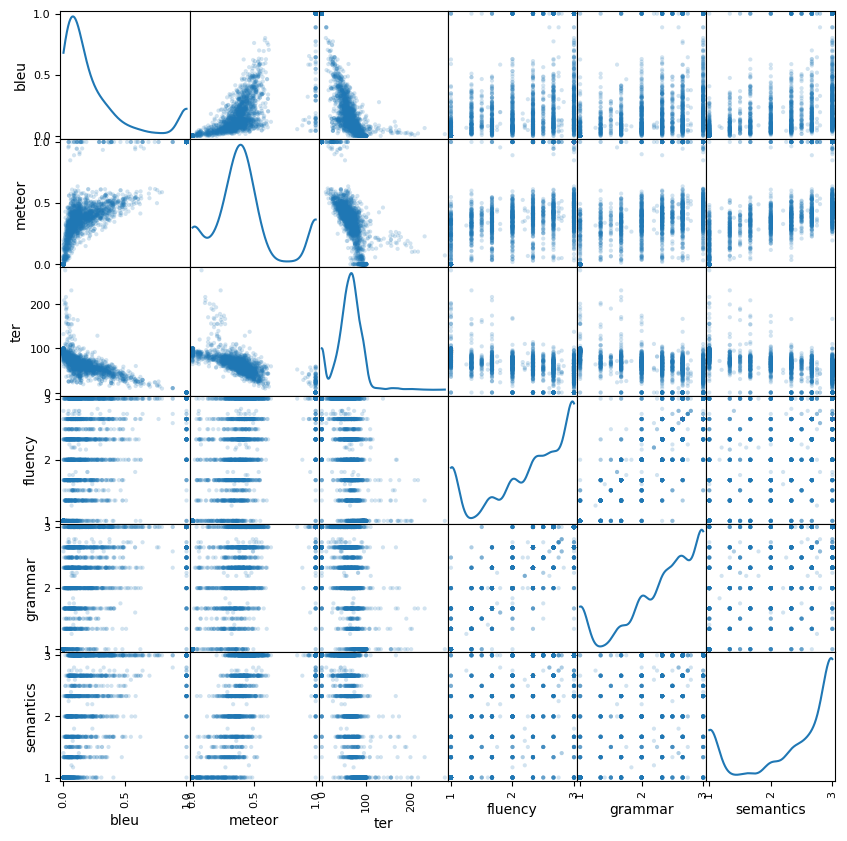

In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(ratings_df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()


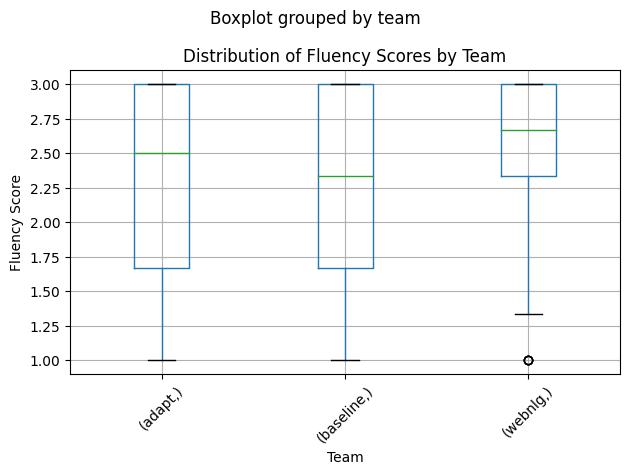

In [16]:

import matplotlib.pyplot as plt
teams = ['adapt', 'baseline','webnlg']
df = ratings_df[ratings_df['team'].isin(teams)]

df.boxplot(column='fluency', by=['team'], rot=45)
plt.xlabel('Team')
plt.ylabel('Fluency Score')
_ = plt.title('Distribution of Fluency Scores by Team')
plt.tight_layout()
plt.show()


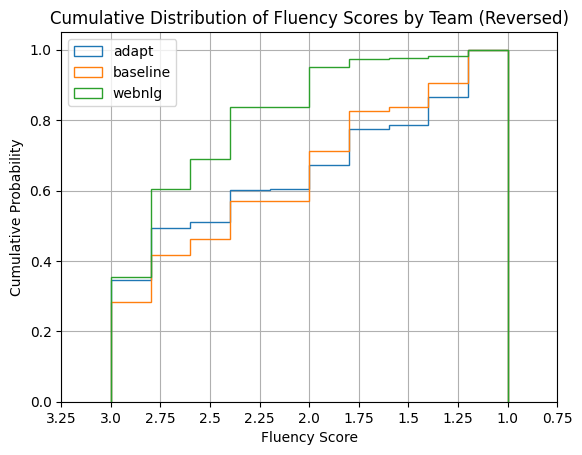

In [17]:

import matplotlib.pyplot as plt
# Iterate over teams and plot CDFs
for team in teams:
    team_data = -df[df['team'] == team]['fluency']
    plt.hist(team_data, density=True, cumulative=True, histtype='step', label=team, range=(-3,-1)) # Note: range is reversed

plt.xlabel('Fluency Score')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Fluency Scores by Team (Reversed)')
plt.legend()
plt.grid(True)

# Get current x-ticks
xticks = plt.xticks()[0]

# Set new x-ticks as absolute values of the current ones
plt.xticks(xticks, labels=[abs((x)) for x in xticks])

plt.show()


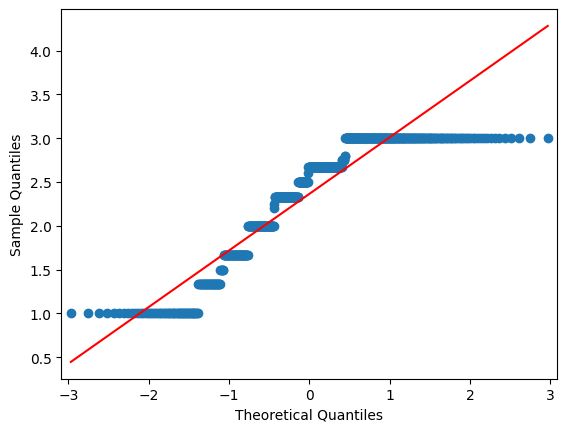

In [18]:

import statsmodels.api as sm
import pylab

sm.qqplot(df['fluency'], line='s')
pylab.show()


In [19]:
from scipy.stats import shapiro
stat, p = shapiro(df['fluency'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')


Statistics=0.854, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
!pip install -U statsmodels

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import pandas as pd
# Create dummy variables for the teams, dropping 'baseline' as the reference
df_dummies = pd.get_dummies(df, columns=['team'])

# Fit the ANOVA model with dummy variables
model = ols('fluency ~ team_webnlg + team_adapt', data=df_dummies).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                 sum_sq     df          F        PR(>F)
team_webnlg   12.589696    1.0  31.907471  2.396515e-08
team_adapt     0.008820    1.0   0.022353  8.811974e-01
Residual     262.782897  666.0        NaN           NaN


In [21]:
# Print F-statistic and p-value for each team
print("F-statistic for webnlg:", anova_table['F']['team_webnlg'])
print("p-value for webnlg:", anova_table['PR(>F)']['team_webnlg'])
print("F-statistic for adapt:", anova_table['F']['team_adapt'])
print("p-value for adapt:", anova_table['PR(>F)']['team_adapt'])

# Interpret the results based on p-values
alpha = 0.05  # Set significance level
if anova_table['PR(>F)']['team_webnlg'] < alpha:
  print("There is a significant difference in fluency scores between the baseline and webnlg teams.")
else:
  print("There is no significant difference in fluency scores between the baseline and webnlg teams.")

if anova_table['PR(>F)']['team_adapt'] < alpha:
  print("There is a significant difference in fluency scores between the baseline and adapt teams.")
else:
  print("There is no significant difference in fluency scores between the baseline and adapt teams.")


F-statistic for webnlg: 31.90747062588611
p-value for webnlg: 2.396515386428184e-08
F-statistic for adapt: 0.02235289076317467
p-value for adapt: 0.8811974032943491
There is a significant difference in fluency scores between the baseline and webnlg teams.
There is no significant difference in fluency scores between the baseline and adapt teams.


In [22]:
# Reshape the data for paired analysis
df_paired = df.pivot(index='mr', columns='team', values='fluency')

# Perform paired t-tests
from scipy import stats

webnlg_vs_baseline = stats.ttest_rel(df_paired['webnlg'], df_paired['baseline'])
adapt_vs_baseline = stats.ttest_rel(df_paired['adapt'], df_paired['baseline'])

print("WebNLG vs Baseline (paired t-test):", webnlg_vs_baseline)
print("Adapt vs Baseline (paired t-test):", adapt_vs_baseline)

# Interpret the results based on p-values
alpha = 0.05  # Set significance level

if webnlg_vs_baseline.pvalue < alpha:
  print("There is a significant difference in fluency scores between the baseline and webnlg teams (paired).")
else:
  print("There is no significant difference in fluency scores between the baseline and webnlg teams (paired).")

if adapt_vs_baseline.pvalue < alpha:
  print("There is a significant difference in fluency scores between the baseline and adapt teams (paired).")
else:
  print("There is no significant difference in fluency scores between the baseline and adapt teams (paired).")


WebNLG vs Baseline (paired t-test): TtestResult(statistic=6.832765470780194, pvalue=7.913718591697301e-11, df=222)
Adapt vs Baseline (paired t-test): TtestResult(statistic=0.16181496888161268, pvalue=0.8715987401803755, df=222)
There is a significant difference in fluency scores between the baseline and webnlg teams (paired).
There is no significant difference in fluency scores between the baseline and adapt teams (paired).


In [23]:
# prompt: since the data is not normal use a non-parametric test

# Perform Wilcoxon signed-rank tests for paired comparisons
webnlg_vs_baseline = stats.wilcoxon(df_paired['webnlg'], df_paired['baseline'])
adapt_vs_baseline = stats.wilcoxon(df_paired['adapt'], df_paired['baseline'])

print("WebNLG vs Baseline (Wilcoxon signed-rank test):", webnlg_vs_baseline)
print("Adapt vs Baseline (Wilcoxon signed-rank test):", adapt_vs_baseline)

# Interpret the results based on p-values
alpha = 0.05  # Set significance level

if webnlg_vs_baseline.pvalue < alpha/2.:
  print("There is a statistically significant difference in fluency scores between the baseline and webnlg teams (paired, non-parametric).")
else:
  print("There is no statistically significant difference in fluency scores between the baseline and webnlg teams (paired, non-parametric).")

if adapt_vs_baseline.pvalue < alpha/2:
  print("There is a statistically significant difference in fluency scores between the baseline and adapt teams (paired, non-parametric).")
else:
  print("There is no statistically significant difference in fluency scores between the baseline and adapt teams (paired, non-parametric).")


WebNLG vs Baseline (Wilcoxon signed-rank test): WilcoxonResult(statistic=3814.5, pvalue=4.09029472281393e-09)
Adapt vs Baseline (Wilcoxon signed-rank test): WilcoxonResult(statistic=6831.0, pvalue=0.9785538223986878)
There is a statistically significant difference in fluency scores between the baseline and webnlg teams (paired, non-parametric).
There is no statistically significant difference in fluency scores between the baseline and adapt teams (paired, non-parametric).
